In [59]:
%reload_ext autoreload
%autoreload 2
    
import h5py as h5
import aftpy.aftmap as aft
import aftpy.getaftdata as aftget
import matplotlib.pyplot as plt
from astropy.time import Time
import datetime as dt
import sunpy.map
file1 = "/Users/bjha/Data/AFT/AFTfarmaps/v2_300_10/2020/01/AFTmap_20200101_0000.h5"
file2 = "/Users/bjha/Downloads/AFTmap_20100502_0000.h5"

aftmap1 = aft.AFTmap(file1)
aftmap2 = aft.AFTmap(file2)

aftdata = aft.AFTload(path="/Users/bjha/Data/aftmaps/2014")
# aftmap1.info

RootDir   : /Users/bjha/Data/aftmaps/2014 
FileType  : aftmap                        
# Files   : 1460                          
T-Initial : 2014-01-01 00:00:00           
T-End     : 2014-12-31 18:00:00           


In [62]:
aftdata.timestamps.decimalyear

array([2014.        , 2014.00068493, 2014.00136986, ..., 2014.99794521,
       2014.99863014, 2014.99931507])

In [63]:
from sunpy.map.header_helper import make_heliographic_header
map_aft = sunpy.map.Map(aftmap2.aftmap, aftmap2.header)
carr_header = make_heliographic_header(map_aft.date, map_aft.observer_coordinate,
                                       aftmap2.aftmap.shape, frame='carrington', projection_code="CEA")
mapout = map_aft.reproject_to(carr_header)

Text(0.5, 1.0, 'Source surface magnetic field')

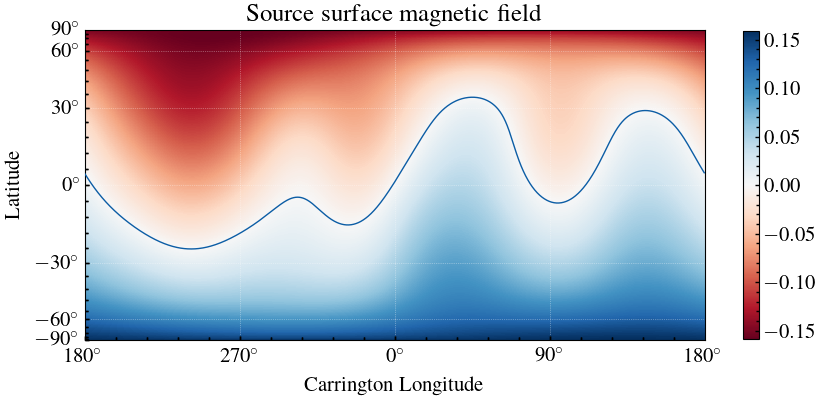

In [65]:
import pfsspy
from pfsspy import coords, tracing

nrho = 35
rss = 2.5

pfss_in = pfsspy.Input(mapout, nrho, rss)

pfss_out = pfsspy.pfss(pfss_in)
ss_br = pfss_out.source_surface_br

# Create the figure and axes
fig = plt.figure(figsize=(10,5))
ax = plt.subplot(projection=ss_br)

# Plot the source surface map
ss_br.plot()

# Plot the polarity inversion line
ax.plot_coord(pfss_out.source_surface_pils[0])

# Plot formatting
plt.colorbar(shrink=0.8)
ax.set_title('Source surface magnetic field')
# set_axes_lims(ax)

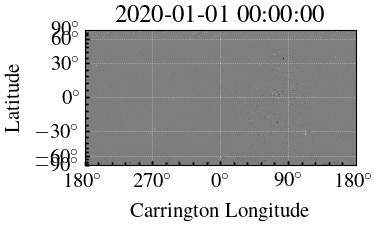

In [38]:
mapout.plot()

In [21]:
aftdata.convert_all(outpath="/Users/bjha/Data/AFT/test_fits")

In [7]:
hipft=aft.AFTmap("/Users/bjha/Data/oft/OFTmaps/hipft_brmap_idx000100.h5",
                 filetype="hipft", timestamp="2024-01-01T00:00:00")

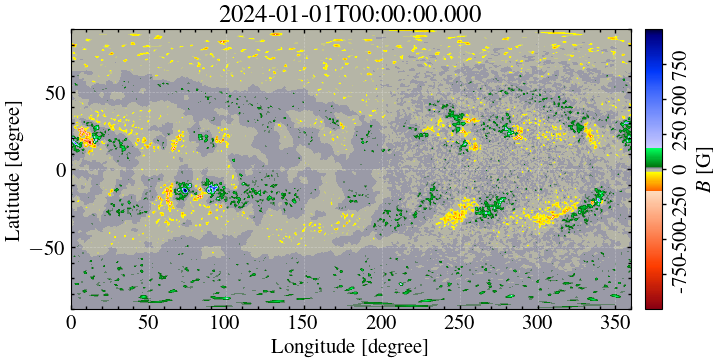

(<Figure size 700x350 with 2 Axes>,
 <Axes: title={'center': '2024-01-01T00:00:00.000'}, xlabel='Longitude [degree]', ylabel='Latitude [degree]'>)

In [8]:
hipft.plot()

In [4]:
import datetime as dt
hipft_prop ={"T0":dt.datetime(2022,1,1), "dt":1}
hipdata = aft.AFTload(path="/Users/bjha/Data/oft/OFTmaps/",
                 filetype="hipft", hipft_prop=hipft_prop)

RootDir   : /Users/bjha/Data/oft/OFTmaps/ 
FileType  : hipft                         
# Files   : 366                           
T-Initial : 2022-01-01 00:00:00           
T-End     : 2023-01-01 00:00:00           


In [11]:
hipft.ymd

('2024', '01', '01')

In [5]:
daft = aftget.AFTdownload()
url = daft.get_list(t0=dt.datetime(2015, 1,1), t1=dt.datetime(2016, 1,1), cadance=1)
# daft.download(url,rootpath="/Users/bjha/Data/test/")

In [6]:
url

,urls
times,
2015-01-01T00:00:00,https://data.boulder.swri.edu/lisa/AFT_Baselin...
2015-01-02T00:00:00,https://data.boulder.swri.edu/lisa/AFT_Baselin...
2015-01-03T00:00:00,https://data.boulder.swri.edu/lisa/AFT_Baselin...
2015-01-04T00:00:00,https://data.boulder.swri.edu/lisa/AFT_Baselin...
2015-01-05T00:00:00,https://data.boulder.swri.edu/lisa/AFT_Baselin...
...,...
2015-12-27T00:00:00,https://data.boulder.swri.edu/lisa/AFT_Baselin...
2015-12-28T00:00:00,https://data.boulder.swri.edu/lisa/AFT_Baselin...
2015-12-29T00:00:00,https://data.boulder.swri.edu/lisa/AFT_Baselin...


In [2]:
a=AFTdownload()
b=a.get_list(t0=dt.datetime(2013, 1,1), t1=dt.datetime(2014, 1,1), dt=4)

In [3]:
a.download(b, rootpath="/Users/bjha/Data/test/")
# urlretrieve(b.urls.values[0], os.path.basename(b.urls.values[0]))

100%|██████████| 365/365 [01:27<00:00,  4.15it/s]


In [54]:
pd.read_csv("data/list_of_files.csv", index_col="times").index

Index(['2010-05-01T06:00:00', '2010-05-01T12:00:00', '2010-05-01T18:00:00',
       '2010-05-02T00:00:00', '2010-05-02T06:00:00', '2010-05-02T12:00:00',
       '2010-05-02T18:00:00', '2010-05-03T00:00:00', '2010-05-03T06:00:00',
       '2010-05-03T12:00:00',
       ...
       '2023-12-30T12:00:00', '2023-12-30T18:00:00', '2023-12-31T00:00:00',
       '2023-12-31T06:00:00', '2023-12-31T12:00:00', '2023-12-31T18:00:00',
       '2024-01-01T00:00:00', '2024-01-01T06:00:00', '2024-01-01T12:00:00',
       '2024-01-01T18:00:00'],
      dtype='object', name='times', length=19975)

In [96]:
os.path.basename(b.urls.iloc[0])

'AFTmap_20120101_0000.h5'

In [98]:
np.full(10, "data")

array(['data', 'data', 'data', 'data', 'data', 'data', 'data', 'data',
       'data', 'data'], dtype='<U4')